# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset พันธุ์หมาแมว [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)

In [3]:
path = untar_data(URLs.PETS)
path_images = path/'images'
filenames = get_image_files(path_images)[:100]

# 3. เตรียมข้อมูล

เพื่อความสะดวก เราจะประกาศฟังก์ชัน แล้วไปเรียกสร้างก่อน fit ด้วย Dropout แต่ละแบบ

In [ ]:
batchsize = 32
epoch = 16
np.random.seed(55)
regex_pattern = r'/([^/]+)_\d+.jpg$'

def get_databunch():
    return ImageDataBunch.from_name_re(path_images, filenames, 
                                   regex_pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=batchsize).normalize(imagenet_stats)

# 4. สร้างโมเดล

เพื่อความสะดวก เราจะประกาศฟังก์ชัน แล้วไปเรียกสร้างก่อน fit ด้วย Dropout แต่ละแบบ

* เคสนี้เราจะใช้โมเดล models.resnet34
* pretrained=False หมายถึง เราจะเริ่มเทรนตั้งแต่ต้น ไม่เอา Weight ที่เคยเทรนกับ ImageNet มาแล้วมาใช้

In [ ]:
def get_learner(databunch):
    return cnn_learner(databunch, models.resnet34, 
                      pretrained=False, ps=ps, 
                      metrics=accuracy, callback_fns=ShowGraph)

# 5. เริ่มต้นเทรนโมเดล

ปกติ ps จะมีค่า Default เท่ากับ 0.5 เราจะลองเทรนด้วย ps ต่ำมาก ไป สูงมาก เปรียบเทียบกับ [Image Classification ep.3](https://www.bualabs.com/archives/509/mnist-fastai-resnet18-image-classification-ep-3/) ดูว่าจะเป็นอย่างไร

## ลองเทรนโดยไม่ Droput เลย ด้วย ps = 0.0

/home/jupyter/fastai/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
yorkshire_terrier, newfoundland
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time
0,3.753150,9.669485,0.000000,00:13
1,3.722123,4.351848,0.062500,00:13
2,3.628583,3.804570,0.062500,00:12
3,3.529925,3.603138,0.000000,00:12
4,3.436646,3.603252,0.000000,00:12
5,3.389474,3.746600,0.000000,00:12
6,3.321263,3.958417,0.000000,00:12
7,3.256354,4.174581,0.062500,00:12
8,3.168898,4.376184,0.062500,00:12
9,3.092629,4.629743,0.062500,00:12


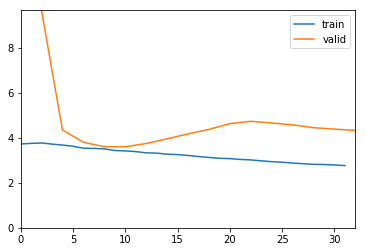

In [ ]:
ps = 0.0

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

## ลองเทรนด้วย Droput นิด ๆ ด้วย ps = 0.25

epoch,train_loss,valid_loss,accuracy,time
0,3.843311,5.623949,0.000000,00:13


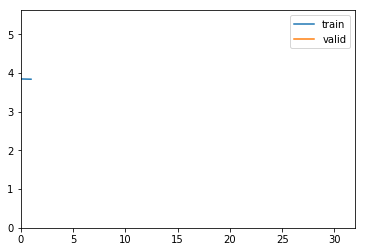

In [ ]:
ps = 0.25

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

## ลองเทรนด้วย Droput กลาง ๆ ด้วย ps = 0.5

In [ ]:
ps = 0.5

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

## ลองเทรนด้วย Droput มาก ๆ ด้วย ps = 0.75

In [ ]:
ps = 0.75

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

## ลองเทรนด้วย Droput ให้หมดเลย ด้วย ps = 1.0

In [ ]:
ps = 1.0

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

# 6. สรุป

เปรียบเทียบ การเทรนแต่ละ Batch Size ในตารางดังนี้

| Batch Size | Time  | Accuracy | Memory  |
|-----------:|-------|---------:|---------|
|        512 | 08:35 |      24% | Large   |
|          2 | 34:00 |       2% | Small   |
|         64 | 07:09 |      54% | Medium  |
|         32 | 07:23 |      62% | Medium  |

# หมายเหตุ

* อันนี้เป็นการทดสอบแบบคร่าว ๆ ให้พอเห็นภาพ มีตัวแปรอีกหลายอย่าง
* ใน Framework มีการใช้อีกหลายอัลกอริทึมโดย Default อาจทำให้ผลลัพธ์แตกต่างกันไป
* แต่ละ learner มีการ Initial Weight ที่แตกต่างกัน

# Credit 

* [The “BS<=32” paper Topic on Fastai Forum](https://forums.fast.ai/t/the-bs-32-paper/38935)
* [Revisiting Small Batch Training for Deep Neural Networks Dominic Masters, Carlo Luschi (Submitted on 20 Apr 2018)](https://arxiv.org/abs/1804.07612)
* [Yann LeCun on Twitter: "Training with large minibatches is bad for ...](https://twitter.com/ylecun/status/989610208497360896)